# 在 Google Colab 上运行中国象棋棋谱识别

- 1. 训练
- 2. 测试
- 3. 模型推理
- 4. transform 预览
- 5. 导出 onnx


[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TheOne1006/chinese-chess-recognition/blob/main/cchess_reg/examples/run_on_colab.ipynb)


# 0. 持久化 pip_cache
- 避免在 mmcv 编译耗时
- tips: cpu 还是 gpu 版本

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 判断 是否支持 gpu
import torch

if torch.cuda.is_available():
    cache_dir = '/content/drive/MyDrive/pip_cache_cchess_reg_gpu'
    build_cache_dir = '/content/drive/MyDrive/build_cache_cchess_reg_gpu'
else:
    cache_dir = '/content/drive/MyDrive/pip_cache_cchess_reg_cpu'
    build_cache_dir = '/content/drive/MyDrive/build_cache_cchess_reg_cpu'

# 1. 设置 pip cache
%env PIP_CACHE_DIR={cache_dir}
# 2. 创建持久化编译目录
%env TORCH_EXTENSIONS_DIR={build_cache_dir}

env: PIP_CACHE_DIR=/content/drive/MyDrive/pip_cache_cchess_reg_cpu
env: TORCH_EXTENSIONS_DIR=/content/drive/MyDrive/build_cache_cchess_reg_cpu


## 1. 检查 GPU 环境

首先，让我们检查 Colab 分配的 GPU 类型。

In [ ]:
!nvidia-smi

Sun Mar  2 14:25:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2. 克隆项目代码

接下来，我们克隆项目代码到 Colab 环境中。

In [3]:
# 克隆项目代码
!git clone https://github.com/TheOne1006/chinese-chess-recognition.git
%cd chinese-chess-recognition

Cloning into 'chinese-chess-recognition'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 178 (delta 49), reused 174 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (178/178), 6.17 MiB | 28.22 MiB/s, done.
Resolving deltas: 100% (49/49), done.
/content/chinese-chess-recognition


## 3. 安装依赖

安装项目所需的依赖，包括 MMPose 和其他必要的库。  
在 colab 上非常耗时...

In [6]:
# 安装 PyTorch 和 torchvision
%cd /content/chinese-chess-recognition
!pip install -v -e .

/content/chinese-chess-recognition
Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
Obtaining file:///content/chinese-chess-recognition
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-3uzycuea
  Entered build tracker: /tmp/pip-build-tracker-3uzycuea
  Created temporary directory: /tmp/pip-install-jf5folak
  Created temporary directory: /tmp/pip-ephem-wheel-cache-atvilfbw
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  Starting new HTTPS conne

## 4. 下载数据集

下载并准备中国象棋 棋谱识别 数据集。

In [1]:
# 创建数据目录
%cd /content/chinese-chess-recognition/cchess_reg
!gdown https://drive.google.com/uc?id=1OSnDGohrt-Nb59sTtFtSaqKnspTjzU6X
!unzip -q -o reg_data.zip

/content/chinese-chess-recognition/cchess_reg
Downloading...
From (original): https://drive.google.com/uc?id=1OSnDGohrt-Nb59sTtFtSaqKnspTjzU6X
From (redirected): https://drive.google.com/uc?id=1OSnDGohrt-Nb59sTtFtSaqKnspTjzU6X&confirm=t&uuid=0c23e5ca-66f2-4d40-9196-55b55c0ce6d0
To: /content/chinese-chess-recognition/cchess_reg/reg_data.zip
100% 89.4M/89.4M [00:01<00:00, 45.8MB/s]


## 5. 下载预训练模型

下载 识别 的预训练模型权重。

In [2]:
# 创建预训练模型目录
!mkdir -p /content/chinese-chess-recognition/cchess_reg/checkpoints
%cd /content/chinese-chess-recognition/cchess_reg/checkpoints
!gdown https://drive.google.com/uc?id=13WPo57EbHaAb7Js3yLHfBAEYRm0zBF8r

/content/chinese-chess-recognition/cchess_reg/checkpoints
Downloading...
From (original): https://drive.google.com/uc?id=13WPo57EbHaAb7Js3yLHfBAEYRm0zBF8r
From (redirected): https://drive.google.com/uc?id=13WPo57EbHaAb7Js3yLHfBAEYRm0zBF8r&confirm=t&uuid=37a65020-e6b3-4f23-8398-d8e1d0d9fd08
To: /content/chinese-chess-recognition/cchess_reg/checkpoints/epoch_200.pth
100% 100M/100M [00:02<00:00, 45.4MB/s] 


## 6. 训练模型

使用 `train.py` 脚本训练模型。

In [3]:
%cd /content/chinese-chess-recognition/cchess_reg

/content/chinese-chess-recognition/cchess_reg


In [5]:
# 训练模型（可以根据需要调整参数）
!python tools/train.py configs/swinv2-nano_cchess16-256-demo.py \
    --work-dir work_dirs/swinv2-nano_cchess16-256-demo # --amp

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-03-03 06:19:54.701256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740982794.754593    4511 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740982794.777280    4511 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 06:19:54.835856: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use a

## 7. 测试模型

使用 `test.py` 脚本评估训练好的模型。

In [ ]:
# 测试模型
%cd /content/chinese-chess-recognition/cchess_reg
!python tools/test.py \
    configs/swinv2-nano_cchess16-256.py \
    checkpoints/epoch_200.pth

/content/chinese-chess-recognition/cchess_reg
/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
2025-03-03 06:25:08.911177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740983109.005082    5823 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740983109.028142    5823 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 06:25:09.075782: I tensorflow/core/platform/cpu_feature_guard.cc:210

## 8. 模型推理

使用训练好的模型进行推理， 识别棋谱。

In [13]:
%cd /content/chinese-chess-recognition/cchess_reg

/content/chinese-chess-recognition/cchess_reg


In [14]:
from cchess_reg.models import *
from cchess_reg.datasets import *

In [ ]:
from cchess_reg.apis.cchess_image_classification import CChessImageClassificationInferencer
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Rectangle

def visualize_chess_board(img, results, score_thr=0.5):
    """可视化棋盘识别结果"""
    plt.figure(figsize=(12, 10))

    # 显示原始图像
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # 获取图像尺寸
    h, w = img.shape[:2]

    # 棋盘有10行9列
    rows, cols = 10, 9

    offset_x, offset_y = 50, 50

    # 计算每个格子的大小
    cell_h, cell_w = (h - offset_y * 2) / (rows - 1), (w - offset_x * 2) / (cols - 1)

    # 解析结果
    pred_scores = results[0]['pred_scores']  # 形状为 [90, 16]
    pred_labels = results[0]['pred_label']   # 形状为 [90]
    pred_classes = results[0]['pred_class']  # 形状为 [90]
    pred_score = results[0]['pred_score']    # 形状为 [90]

    # 绘制棋盘格子和标签
    for i in range(rows * cols):
        row, col = i // cols, i % cols

        # 只显示置信度大于阈值的预测
        if pred_score[i] > score_thr:
            # 计算格子左上角坐标
            x, y = col * cell_w + offset_x - cell_w/2, row * cell_h + offset_y - cell_h/2

            # 绘制矩形和标签
            rect = Rectangle((x, y), cell_w, cell_h,
                             linewidth=1, edgecolor='r', facecolor='none', alpha=0.5)
            plt.gca().add_patch(rect)

            # 获取类别和置信度
            label = pred_classes[i]
            conf = pred_score[i]

            # 根据标签是否为大写选择不同的颜色
            if label.isupper():
                facecolor = 'RED'
            else:
                facecolor = 'green'

            if label == 'x':
                facecolor = 'black'
            elif label == '.':
                facecolor = 'white'

            # 在格子中心绘制类别和置信度
            plt.text(x + cell_w/2, y + cell_h/2,
                     f'{label}\n{conf:.2f}',
                     color='white',
                     bbox=dict(facecolor=facecolor, alpha=0.3),
                     ha='center', va='center')

    plt.title("cchess reg")
    plt.axis('off')

    plt.show()


def format_fen(results, score_thr=0.5):
    """将识别结果转换为FEN格式"""
    pred_classes = results[0]['pred_class']  # 形状为 [90]
    pred_score = results[0]['pred_score']    # 形状为 [90]

    # 初始化FEN字符串
    fen = []

    # 遍历每一行
    for row in range(10):
        row_fen = []
        empty_count = 0

        for col in range(9):
            idx = row * 9 + col
            piece = pred_classes[idx]
            confidence = pred_score[idx]

            # 只处理置信度大于阈值的预测
            if confidence > score_thr:
                if piece == '.' or piece == 'x':  # 空白点
                    empty_count += 1
                else:  # 棋子
                    if empty_count > 0:
                        row_fen.append(str(empty_count))
                        empty_count = 0
                    row_fen.append(piece)
            else:  # 置信度低，视为空白
                empty_count += 1

        # 处理行尾的空白
        if empty_count > 0:
            row_fen.append(str(empty_count))

        # 将当前行加入FEN
        fen.append(''.join(row_fen))

    # 按照FEN格式连接，使用'/'分隔行
    return '/'.join(fen)


In [15]:
model = 'configs/swinv2-nano_cchess16-256.py'
checkpoint = 'checkpoints/epoch_200.pth'
img = 'data/cchess_multi_label_layout/val/20250219_qilu_val_250218123431.jpg'
device = 'cpu'
score_thr = 0.2

inferencer = CChessImageClassificationInferencer(
    model=model,
    pretrained=checkpoint,
    device=device
)

Loads checkpoint by local backend from path: checkpoints/epoch_200.pth


/usr/local/lib/python3.11/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_l

03/03 06:27:20 - mmengine - INFO - Delete `relative_position_index` and `relative_coords_table` since we always re-init these params according to the `window_size`, which might cause unwanted but unworried warnings when loading checkpoint.
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.stages.0.blocks.0.attn.w_msa.relative_coords_table, backbone.stages.0.blocks.0.attn.w_msa.relative_position_index, backbone.stages.0.blocks.1.attn.w_msa.relative_coords_table, backbone.stages.0.blocks.1.attn.w_msa.relative_position_index, backbone.stages.1.blocks.0.attn.w_msa.relative_coords_table, backbone.stages.1.blocks.0.attn.w_msa.relative_position_index, backbone.stages.1.blocks.1.attn.w_msa.relative_coords_table, backbone.stages.1.blocks.1.attn.w_msa.relative_position_index, backbone.stages.2.blocks.0.attn.w_msa.relative_coords_table, backbone.stages.2.blocks.0.attn.w_msa.relative_position_index, backbone.stages.2.blocks.1.attn.w_msa.relative_coor

Output()

FEN表示： 2bak4/4a4/2c1c1n1b/4p1R1p/pn2r4/3N3N1/P3P3P/C3B2C1/4A4/2BAK4

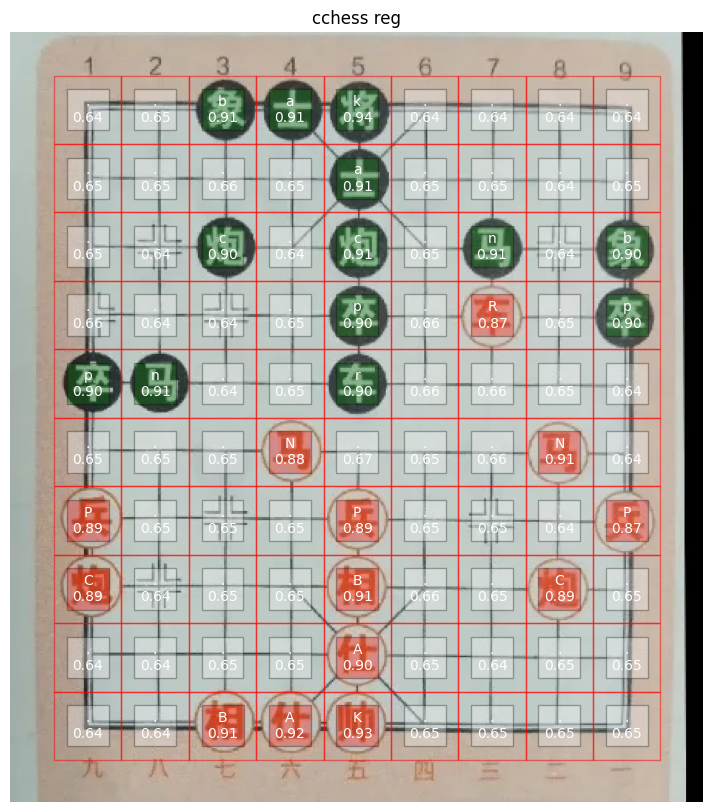

In [16]:
# 进行推理
results = inferencer(img)

img_array = cv2.imread(img)


# 生成并显示FEN表示
fen = format_fen(results, score_thr)
print("FEN表示：", fen)

# 可视化结果
visualize_chess_board(img_array, results, score_thr)



## 9. 预览数据增强效果

使用 preview_transform.ipynb 中的代码预览数据增强效果。

In [17]:
from mmengine.config import Config

from mmpretrain.registry import DATASETS

In [18]:
config = Config.fromfile('configs/swinv2-nano_cchess16-256.py')
dataset = DATASETS.build(config.train_dataloader.dataset)

In [19]:

dict_cate_names = {
    'point': '.',
    'other': 'x',
    'red_king': 'K',
    'red_advisor': 'A',
    'red_bishop': 'B',
    'red_knight': 'N',
    'red_rook': 'R',
    'red_cannon': 'C',
    'red_pawn': 'P',
    'black_king': 'k',
    'black_advisor': 'a',
    'black_bishop': 'b',
    'black_knight': 'n',
    'black_rook': 'r',
    'black_cannon': 'c',
    'black_pawn': 'p',
}

cate_names = list(dict_cate_names.values())
def label_to_str(label):

    output = [cate_names[i] for i in label]
    output = ''.join(output)
    # 每 9 个字符插入一个换行符
    output = '\n'.join([output[i:i+9] for i in range(0, len(output), 9)])
    return output

In [20]:
import cv2
import matplotlib.pyplot as plt

def show_origin_and_transform(index = 0):
    item = dataset[index]

    try:
        img_path = item['data_samples'].img_path

        plt.subplot(1, 2, 1)
        origin_img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        ann_path = img_path.replace('.jpg', '.txt').replace('.png', '.txt')
        # 读取 ann_path 文件
        ann_text = ''
        with open(ann_path, 'r') as f:
            ann_text = f.read()

        # to rgb
        plt.imshow(origin_img_rgb)
        origin_title = 'origin \n'
        origin_title += ann_text
        plt.title(origin_title, fontfamily='monospace')
        plt.subplot(1, 2, 2)
        # # to rgb
        transform_img = item['inputs'].numpy().transpose(1, 2, 0)
        # # bgr to rgb

        transform_img = transform_img[...,::-1]
        plt.imshow(transform_img)

        gt_label = item['data_samples'].gt_label.tolist()


        transform_title = 'transform \n'
        transform_title += label_to_str(gt_label)
        plt.title(transform_title, fontfamily='monospace')
        plt.show()
        # 打印  路径
    except Exception as e:
        item_data_samples = item['data_samples']
        print("has error")
        print(item_data_samples)
        raise e

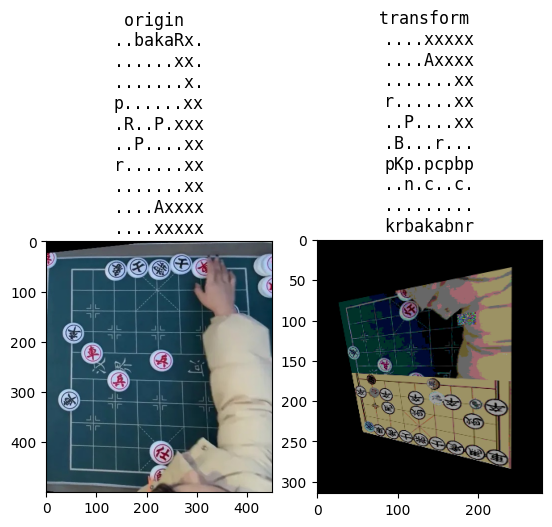

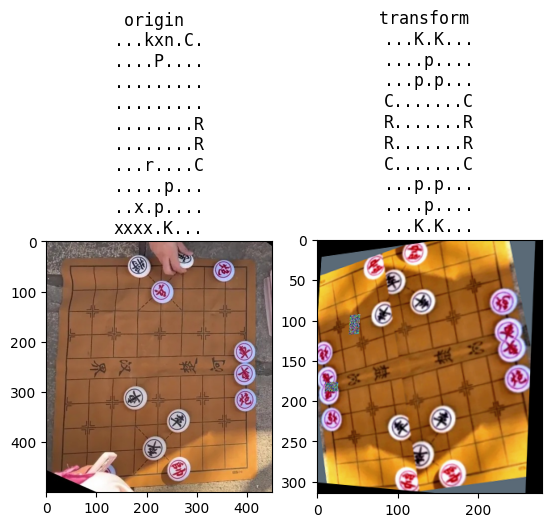

In [22]:
# 循环 N 次
len_dataset = len(dataset)
for i in range(2):
    index = i % len_dataset
    show_origin_and_transform(index + 5)


# 10. 导出 onnx


将模型导出为 ONNX 格式，以便在其他环境中部署。

classification_onnxruntime_static_cchess.py



In [24]:
%cd /content/chinese-chess-recognition/cchess_reg

!python tools/deploy.py \
     configs/deploy/classification_onnxruntime_static_cchess.py \
        configs/swinv2-nano_cchess16-256.py  \
        checkpoints/epoch_200.pth \
        data/cchess_multi_label_layout/val/20250219_qilu_val_250218134544.jpg \
    --work-dir work_dirs/deploy \
    --device cpu

/content/chinese-chess-recognition/cchess_reg

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: 
`TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. 
Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \

2025-03-03 06:30:40.095311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT
factory: Attempting to register factory for plugin cuFFT when one has already been registered

WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1740983440.152118    7264 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register 
factory for plugin cuDNN when one has already been registered
E0000 00:00:1740983440.163033    7264 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register 
factory for plugin cuBLAS when one has already been registered

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: 
`TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. 
Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \

2025-03-03 06:30:58.341138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT
factory: Attempting to register factory for plugin cuFFT when one has already been registered
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1740983458.389567    7345 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register 
factory for plugin cuDNN when one has already been registered
E0000 00:00:1740983458.403810    7345 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register 
factory for plugin cuBLAS when one has already been registered

args:  data/cchess_multi_label_layout/val/20250219_qilu_val_250218134544.jpg work_dirs/deploy cchess_reg.onnx 
configs/deploy/classification_onnxruntime_static_cchess.py configs/swinv2-nano_cchess16-256.py 
checkpoints/epoch_200.pth cpu

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: 
`TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. 
Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \

2025-03-03 06:31:16.460344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT
factory: Attempting to register factory for plugin cuFFT when one has already been registered
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1740983476.501578    7433 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register 
factory for plugin cuDNN when one has already been registered
E0000 00:00:1740983476.514116    7433 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register 
factory for plugin cuBLAS when one has already been registered

03/03 06:31:21 - mmengine - INFO - Start pipeline mmdeploy.apis.pytorch2onnx.torch2onnx in subprocess

03/03 06:31:22 - mmengine - WARNING - Failed to search registry with scope "mmpretrain" in the "Codebases" registry
tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause 
unexpected failure when running the built modules. Please check whether "mmpretrain" is a correct scope, or whether
the registry is initialized.
03/03 06:31:22 - mmengine - WARNING - Failed to search registry with scope "mmpretrain" in the "mmpretrain_tasks" 
registry tree. As a workaround, the current "mmpretrain_tasks" registry in "mmdeploy" is used to build instance. 
This may cause unexpected failure when running the built modules. Please check whether "mmpretrain" is a correct 
scope, or whether the registry is initialized.

Loads checkpoint by local backend from path: checkpoints/epoch_200.pth
/usr/local/lib/python3.11/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using 
`torch.load` with `weights_only=False` (the current default value), which uses the default pickle module 
implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling 
(See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future 
release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be 
executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are 
explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting 
`weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on 
GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_location)

03/03 06:31:23 - mmengine - INFO - Delete `relative_position_index` and `relative_coords_table` since we always 
re-init these params according to the `window_size`, which might cause unwanted but unworried warnings when loading
checkpoint.
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.stages.0.blocks.0.attn.w_msa.relative_coords_table, 
backbone.stages.0.blocks.0.attn.w_msa.relative_position_index, 
backbone.stages.0.blocks.1.attn.w_msa.relative_coords_table, 
backbone.stages.0.blocks.1.attn.w_msa.relative_position_index, 
backbone.stages.1.blocks.0.attn.w_msa.relative_coords_table, 
backbone.stages.1.blocks.0.attn.w_msa.relative_position_index, 
backbone.stages.1.blocks.1.attn.w_msa.relative_coords_table, 
backbone.stages.1.blocks.1.attn.w_msa.relative_position_index, 
backbone.stages.2.blocks.0.attn.w_msa.relative_coords_table, 
backbone.stages.2.blocks.0.attn.w_msa.relative_position_index, 
backbone.stages.2.blocks.1.attn.w_msa.relative_coords_table, 
backbone.stages.2.blocks.1.attn.w_msa.relative_position_index, 
backbone.stages.2.blocks.2.attn.w_msa.relative_coords_table, 
backbone.stages.2.blocks.2.attn.w_msa.relative_position_index, 
backbone.stages.2.blocks.3.attn.w_msa.relative_coords_table, 
backbone.stages.2.blocks.3.attn.w_msa.relative_position_index, 
backbone.stages.2.blocks.4.attn.w_msa.relative_coords_table, 
backbone.stages.2.blocks.4.attn.w_msa.relative_position_index, 
backbone.stages.2.blocks.5.attn.w_msa.relative_coords_table, 
backbone.stages.2.blocks.5.attn.w_msa.relative_position_index

03/03 06:31:23 - mmengine - WARNING - DeprecationWarning: get_onnx_config will be deprecated in the future. 
03/03 06:31:23 - mmengine - INFO - Export PyTorch model to ONNX: work_dirs/deploy/cchess_reg.onnx.

/usr/local/lib/python3.11/dist-packages/mmcv/cnn/bricks/transformer.py:125: TracerWarning: Converting a tensor to a
Python float might cause the trace to be incorrect. We can't record the data flow of Python values, so this value 
will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  output_h = math.ceil(input_h / stride_h)
/usr/local/lib/python3.11/dist-packages/mmcv/cnn/bricks/transformer.py:126: TracerWarning: Converting a tensor to a
Python float might cause the trace to be incorrect. We can't record the data flow of Python values, so this value 
will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  output_w = math.ceil(input_w / stride_w)
/usr/local/lib/python3.11/dist-packages/mmcv/cnn/bricks/transformer.py:127: TracerWarning: Converting a tensor to a
Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value
will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_h = max((output_h - 1) * stride_h +
/usr/local/lib/python3.11/dist-packages/mmcv/cnn/bricks/transformer.py:129: TracerWarning: Converting a tensor to a
Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value
will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_w = max((output_w - 1) * stride_w +
/usr/local/lib/python3.11/dist-packages/mmcv/cnn/bricks/transformer.py:143: TracerWarning: Converting a tensor to a
Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value
will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_h > 0 or pad_w > 0:
/usr/local/lib/python3.11/dist-packages/mmpretrain/models/utils/embed.py:39: TracerWarning: Converting a tensor to 
a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this 
value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if src_shape[0] == dst_shape[0] and src_shape[1] == dst_shape[1]:
/usr/local/lib/python3.11/dist-packages/mmpretrain/models/utils/embed.py:44: TracerWarning: Converting a tensor to 
a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this 
value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert L == src_h * src_w + num_extra_tokens, \

/usr/local/lib/python3.11/dist-packages/mmdeploy/codebase/mmpretrain/models/utils/attention.py:68: TracerWarning: 
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of 
Python values, so this value will be treated as a constant in the future. This means that the trace might not 
generalize to other inputs!
  assert L == H * W, f"The query length {L} doesn't match the input "\
/usr/local/lib/python3.11/dist-packages/mmdeploy/codebase/mmpretrain/models/utils/attention.py:75: TracerWarning: 
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of 
Python values, so this value will be treated as a constant in the future. This means that the trace might not 
generalize to other inputs!
  if min(H, W) == window_size:
/usr/local/lib/python3.11/dist-packages/mmdeploy/codebase/mmpretrain/models/utils/attention.py:80: TracerWarning: 
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of 
Python values, so this value will be treated as a constant in the future. This means that the trace might not 
generalize to other inputs!
  elif min(H, W) < window_size:

/usr/local/lib/python3.11/dist-packages/mmpretrain/models/utils/attention.py:462: TracerWarning: Converting a 
tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, 
so this value will be treated as a constant in the future. This means that the trace might not generalize to other 
inputs!
  B = int(windows.shape[0] / (H * W / window_size / window_size))
/usr/local/lib/python3.11/dist-packages/mmdeploy/codebase/mmpretrain/models/utils/attention.py:132: TracerWarning: 
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of 
Python values, so this value will be treated as a constant in the future. This means that the trace might not 
generalize to other inputs!
  if H != H_pad or W != W_pad:

/usr/local/lib/python3.11/dist-packages/mmpretrain/models/utils/embed.py:392: TracerWarning: Converting a tensor to
a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this 
value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert L == H * W, 'input feature has wrong size'

03/03 06:31:27 - mmengine - WARNING - `adaptive_avg_pool2d` would be replaced to `avg_pool2d` explicitly
/usr/local/lib/python3.11/dist-packages/mmdeploy/pytorch/functions/adaptive_pool.py:26: TracerWarning: Converting a
tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, 
so this value will be treated as a constant in the future. This means that the trace might not generalize to other 
inputs!
  k = [int(size[i] / output_size[i]) for i in range(0, len(size))]
/content/chinese-chess-recognition/cchess_reg/models/headers/cchess_table_head.py:46: TracerWarning: Converting a 
tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, 
so this value will be treated as a constant in the future. This means that the trace might not generalize to other 
inputs!
  assert logits.shape[1:] == (16, 10, 9), 'logits.shape must be [BS, 16, 10, 9]'

03/03 06:31:31 - mmengine - INFO - Execute onnx optimize passes.
03/03 06:31:31 - mmengine - WARNING - Can not optimize model, please build torchscipt extension.
More details: https://github.com/open-mmlab/mmdeploy/tree/main/docs/en/experimental/onnx_optimizer.md

03/03 06:31:33 - mmengine - INFO - Finish pipeline mmdeploy.apis.pytorch2onnx.torch2onnx

03/03 06:31:37 - mmengine - INFO - Start pipeline mmdeploy.apis.utils.utils.to_backend in main process

03/03 06:31:37 - mmengine - INFO - Finish pipeline mmdeploy.apis.utils.utils.to_backend
03/03 06:31:37 - mmengine - INFO - visualize onnxruntime model start.

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: 
`TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. 
Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \

2025-03-03 06:31:48.878361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT
factory: Attempting to register factory for plugin cuFFT when one has already been registered

WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1740983508.906431    7576 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register 
factory for plugin cuDNN when one has already been registered
E0000 00:00:1740983508.918873    7576 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register 
factory for plugin cuBLAS when one has already been registered

03/03 06:31:54 - mmengine - WARNING - Failed to search registry with scope "mmpretrain" in the "Codebases" registry
tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause 
unexpected failure when running the built modules. Please check whether "mmpretrain" is a correct scope, or whether
the registry is initialized.
03/03 06:31:54 - mmengine - WARNING - Failed to search registry with scope "mmpretrain" in the "mmpretrain_tasks" 
registry tree. As a workaround, the current "mmpretrain_tasks" registry in "mmdeploy" is used to build instance. 
This may cause unexpected failure when running the built modules. Please check whether "mmpretrain" is a correct 
scope, or whether the registry is initialized.

03/03 06:31:54 - mmengine - WARNING - Failed to search registry with scope "mmpretrain" in the 
"backend_classifiers" registry tree. As a workaround, the current "backend_classifiers" registry in "mmdeploy" is 
used to build instance. This may cause unexpected failure when running the built modules. Please check whether 
"mmpretrain" is a correct scope, or whether the registry is initialized.
03/03 06:31:55 - mmengine - INFO - Successfully loaded onnxruntime custom ops from 
/usr/local/lib/python3.11/dist-packages/mmdeploy/lib/libmmdeploy_onnxruntime_ops.so

2025-03-03:06:31:56 - root - ERROR - topk(): argument 'k' (position 1) must be int, not tuple
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mmdeploy/utils/utils.py", line 41, in target_wrapper
    result = target(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mmdeploy/apis/visualize.py", line 72, in visualize_model
    result = model.test_step(model_inputs)[0]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mmengine/model/base_model/base_model.py", line 145, in test_step
    return self._run_forward(data, mode='predict')  # type: ignore
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mmengine/model/base_model/base_model.py", line 361, in _run_forward
    results = self(**data, mode=mode)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mmdeploy/codebase/mmpretrain/deploy/classification_model.py", line 
124, in forward
    _, label = score.topk(self.head.topk)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: topk(): argument 'k' (position 1) must be int, not tuple

03/03 06:32:01 - mmengine - ERROR - /content/chinese-chess-recognition/cchess_reg/tools/deploy.py - create_process 
- 88 - visualize onnxruntime model failed.